In [13]:
import numpy as np
import matplotlib.pyplot as plt
from modules.mpsk import *

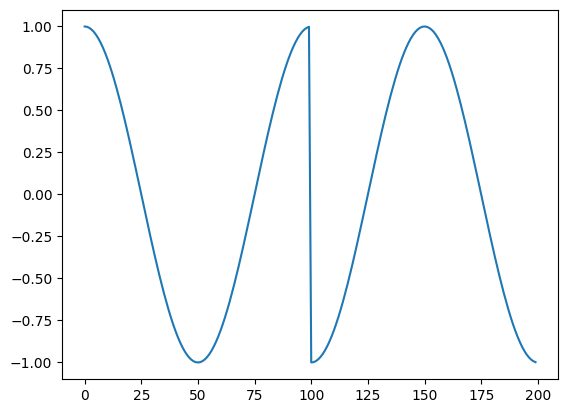

In [47]:
periodos = 1
sample_rate = 10e3
f = 100
t = np.arange(0, periodos*(1/f), 1/sample_rate)
x1 = np.cos(2 * np.pi * f * t)
x2 = np.cos(2 * np.pi * f * t + np.pi)
y = np.concatenate([x1,x2])
plt.plot(y)

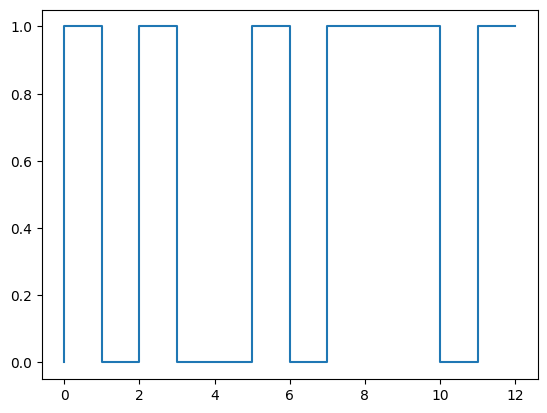

In [56]:
word = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])
plt.step(np.arange(0, len(word)), word)

# Transmissão em Banda Passante

Um sinal pode ser transmitido através de **banda base** ou **banda passante**.

As principais motivações para uma transmissão em banda passante são:

1. Para irradiar um sinal, as dimensões da antena são da ordem de um comprimento de onda.

Exemplo: transmissão de voz em banda base 

$$\begin{aligned}
f = 3\;kHz,\;\lambda = \frac{c}{f} = \frac{3\times 10^8}{3\times 10^3} = 100\;km
\end{aligned}$$

A antena deveria ter 100 km, algo totalmente impossível. Ao modular o sinal em uma portadora de alta frequência, é possível realizar a transmissão de sinais sem fio a longas distâncias.

Por exemplo, transmitindo um sinal através de uma portadora de 900 MHz:

$$\begin{aligned}
f = 900\;MHz,\;\lambda = \frac{c}{f} = \frac{3\times 10^8}{9\times 10^8} = 1/3\;m
\end{aligned}$$

2. A possibilidade de transmitir componentes diferentes do mesmo sinal no mesmo espaço e ao mesmo tempo. Ex.: FDM (Frequency Division Multiplexing)

### Ruído em Sistemas de Comunicação

Considera-se o ruído AWGN (Additive White Gaussian Noise), nome dado por conta das seguintes características:

**Additive**: Numa representação comum e simplficada para sistemas de comunicação, ruído é somado ao sinal recebido e é estatisticamente independente deste.
$$\begin{aligned}
r(t) = s(t) + n(t)
\end{aligned}$$

**White**: A densidade de potência espectral (PSD) do ruído é constante para todas as frequências. Nyquist estudou as propriedades termais do ruído e concluiu que a PSD do ruído está relacionada com a temperatura, e, portanto, em um sistema de comunicação depende da temperatura no Rx.

A PSD bilateral do ruído branco é dado por
$$\begin{aligned}
G_n(f) = \frac{N_0}{2}
\end{aligned}$$

<p align="center">
  <img src="./images/awgn-psd.png">
</p>

Outro ponto importante que implica da característica plana da PSD é que as amostras de ruído são descorrelacionadas. Ou seja:

$$\begin{aligned}
R_n(\tau) = \mathcal{F}^{-1}\left \{ G_n(f) \right \} = \frac{N_0}{2} \delta(t)
\end{aligned}$$

- A função de autocorrelação do ruído é representada por um impulso de amplitude $N_0/2$ em $t=0$
- Portanto, o ruído afeta cada símbolo de forma independende -> canal sem memória.


**Gaussian**: O ruído é gaussiano, ou seja, possui distribuição normal.

$$\begin{aligned}
n \sim G(0,\sigma ^2)
\end{aligned}$$

$$\begin{aligned}
p(n) = \frac{1}{\sigma \sqrt{2 \pi}}exp(-\frac{n^2}{2\sigma ^2})
\end{aligned}$$

- Ou seja, valores próximo a 0 são mais prováveis de ocorrer, enquanto valores distantes de 0 são pouco prováveis de ocorrerem
- $\sigma^2$ é a variância (potência) do ruído



# Phase Shift Keying

A modulação *Phase Shift Keying* insere a informação no sinal transmitido por meio da modificação da fase da portadora.

Seja o sinal transmitido:

$s_i(t) = \sqrt{\frac{2E}{T}}cos(\omega_ct+\phi_i),\; 0\leqslant t\leqslant T$,

a informação estará contida na fase da seguinte forma:

$\phi_i = \frac{2\pi i}{M},\;i=0,1,2,\cdots,M-1$

onde $M$ é a ordem da modulação. 

### BPSK - Binary Phase Shift Keying

Para $M=2$, temos o BPSK (modulação binária). Este tipo de modulação mapeia os bits de informação em $+1$ ou $-1$ por meio de um pulso NRZ (Non-Return to Zero), somando uma fase de $+\pi$ ou $-\pi$ no sinal transmitido. Ou seja, se o bit de informação for 0 -> será mapeado em -1, e se o bit de informação for 1 -> será mapeado em 1.

Fazendo uma simulação com uma sequência de bits dada por `num_bits` e para as SNRs presentes no vetor `EbN0_dBs`, que são as energias dos símbolos (neste caso, energia do bit transmitido) dividido pelo ruído

In [7]:
num_bits = int(1e6)
EbN0_dBs = np.arange(-4, 12, 0.5)

bpsk_BER, bpsk_SER = bpsk(num_bits, EbN0_dBs)

Plotando os resultados simulados, comparando a taxa de erro de bit (BER) e taxa de erro de símbolo (SER) simuladas com as teóricas:

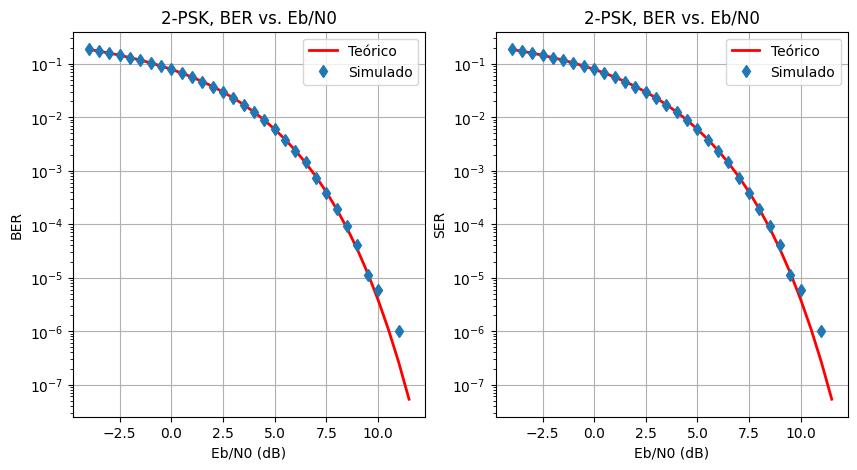

In [18]:
PlotBER_SER(EbN0_dBs,bpsk_BER,bpsk_SER,2)

### QPSK - Quadrature Phase Shift Keying

In [10]:
num_bits = int(1e6)
EbN0_dBs = np.arange(-4, 12, 0.5)

qpsk_BER, qpsk_SER = qpsk(num_bits, EbN0_dBs)

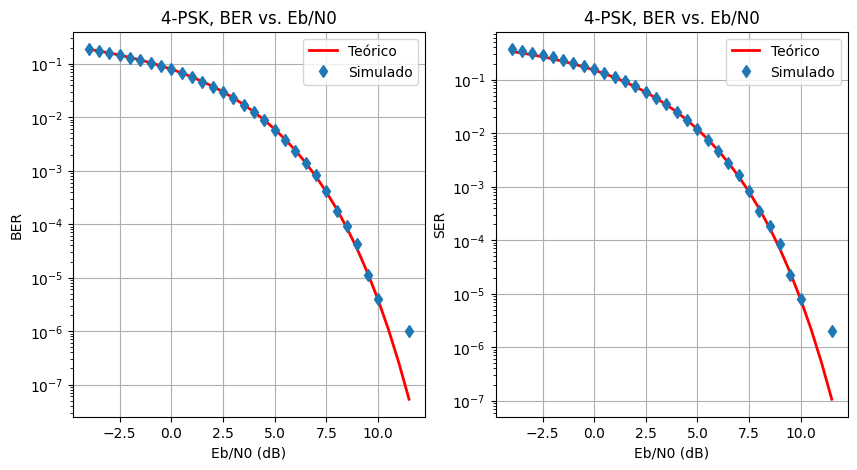

In [15]:
PlotBER_SER(EbN0_dBs,qpsk_BER,qpsk_SER,4)